### Code for plotting different quantities for Notch-delta system:

### Import the libraries

In [1]:
from pyMCDS import pyMCDS
import numpy as np
import matplotlib.pyplot as plt

### Reading the files and retrieving the data

In [5]:
folder="./../plots_NDJ"
print("Files present in the folder")
!ls ./output/*.xml 
print("reading one of the files")
mcds = pyMCDS('output00000006.xml', 'output')

Files present in the folder
./output/final.xml          ./output/output00000003.xml
./output/initial.xml        ./output/output00000004.xml
./output/output00000000.xml ./output/output00000005.xml
./output/output00000001.xml ./output/output00000006.xml
./output/output00000002.xml
reading one of the files
Reading output/output00000006.xml
Reading output/initial_mesh0.mat
Reading output/output00000006_microenvironment0.mat
Parsing substrate data
Reading output/output00000006_cells_physicell.mat


In [6]:
print(mcds.get_time())  # what simulation time is saved here? 
print(mcds.get_cell_variables()) # what data are saved in the cells? 
print(mcds.get_substrate_names())  # what diffusing substrates? 

360.0
['ID', 'position_x', 'position_y', 'position_z', 'total_volume', 'cell_type', 'cycle_model', 'current_phase', 'elapsed_time_in_phase', 'nuclear_volume', 'cytoplasmic_volume', 'fluid_fraction', 'calcified_fraction', 'orientation_x', 'orientation_y', 'orientation_z', 'polarity', 'migration_speed', 'motility_vector_x', 'motility_vector_y', 'motility_vector_z', 'migration_bias', 'motility_bias_direction_x', 'motility_bias_direction_y', 'motility_bias_direction_z', 'persistence_time', 'motility_reserved', 'ext_delta', 'ext_notch', 'ext_jagged', 'delta', 'notch', 'jagged', 'NICD']
['substrate']


In [7]:
mcds.data.keys()

dict_keys(['metadata', 'mesh', 'continuum_variables', 'discrete_cells'])

### Plotting the histograms for the spcecies:

In [8]:
#np.mean( mcds.data['discrete_cells']['oncoprotein'] )
import matplotlib.pyplot as plt

Notch = mcds.data['discrete_cells']['notch']
Delta = mcds.data['discrete_cells']['delta']
Jagged = mcds.data['discrete_cells']['jagged']
NICD = mcds.data['discrete_cells']['NICD']

print ("mean Notch values", np.mean(Notch))
print ("mean Delta values", np.mean(Delta))
print ("mean Jagged values", np.mean(Jagged))
print ("mean NICD values", np.mean(NICD))

mean Notch values 3285.709984659444
mean Delta values 10.45154973966582
mean Jagged values 941.5065644794216
mean NICD values 1732.7021632392311


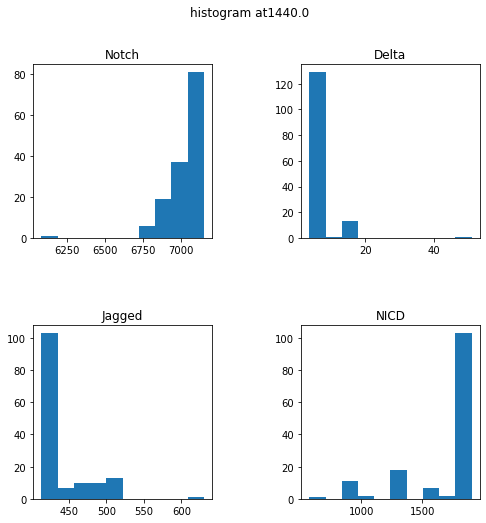

In [16]:
## Histograms
fig, axs = plt.subplots(2,2,figsize=(8,8))        
axs[0,0].hist(Notch);
axs[0,0].set_title('Notch');
axs[0,1].hist(Delta);
axs[0,1].set_title('Delta');
axs[1,0].hist(Jagged);
axs[1,0].set_title('Jagged');
axs[1,1].hist(NICD);
axs[1,1].set_title('NICD');

fig.suptitle("histogram at"+str(mcds.get_time()))
fig.subplots_adjust(hspace=0.5,wspace=0.5)#top=0.90, bottom=0.10, left=0.15, right=0.95, 
fig.savefig(folder+"histogram at"+str(mcds.get_time())+".png")    
#plt.close()

### Scatter Graphs

In [9]:
cx = mcds.data['discrete_cells']['position_x']
cy = mcds.data['discrete_cells']['position_y']

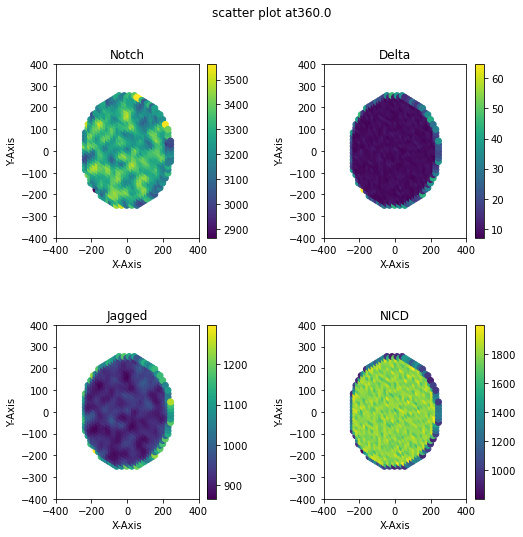

In [15]:
## Scatter plot:
fig, axs=plt.subplots(2,2,figsize=(8,8))

sc=axs[0,0].scatter(cx,cy,c=Notch);
axs[0,0].set(xlabel ='X-Axis', ylabel ='Y-Axis', xlim =[-400, 400], ylim =[-400, 400], title ="Notch")
fig.colorbar(sc,ax=axs[0,0])

sc=axs[0,1].scatter(cx,cy,c=Delta);
axs[0,1].set(xlabel ='X-Axis', ylabel ='Y-Axis', xlim =[-400, 400], ylim =[-400, 400],title ="Delta")
fig.colorbar(sc,ax=axs[0,1])

sc=axs[1,0].scatter(cx,cy,c=Jagged);
axs[1,0].set(xlabel ='X-Axis', ylabel ='Y-Axis', xlim =[-400, 400], ylim =[-400, 400],title ="Jagged")
fig.colorbar(sc,ax=axs[1,0])

sc=axs[1,1].scatter(cx,cy,c=NICD);
axs[1,1].set(xlabel ='X-Axis', ylabel ='Y-Axis', xlim =[-400, 400], ylim =[-400, 400],title ="NICD")
fig.colorbar(sc,ax=axs[1,1])


#plt.axis([-250,250,-250,250])
fig.suptitle("scatter plot at"+str(mcds.get_time()))
fig.subplots_adjust(hspace=0.5,wspace=0.5) #top=0.90, bottom=0.10, left=0.15, right=0.95, 
fig.savefig(folder+"scatter plot at"+str(mcds.get_time())+".png")    
#plt.close()

### Changes over time:

In [23]:
# Let's get live and dead cell counts, mean p (in live cells). We need to loop overall simulation times 

last_index = 6;

notch = np.zeros( last_index+1 ); delta = np.zeros( last_index+1 );
jagged = np.zeros( last_index+1 );nicd = np.zeros( last_index+1 ); 
times = np.zeros( last_index+1 ); 

for n in range( 0,last_index+1 ):
	filename='output'+"%08i"%n+'.xml'
    mcds=pyMCDS(filename,'output')
    times[n]=mcds.get_time()
    no=mcds.data['discrete_cells']['notch']
    de=mcds.data['discrete_cells']['delta']
    ja=mcds.data['discrete_cells']['jagged']ni=mcds.data['discrete_cells']['NICD']notch[n]=np.mean(no);delta[n]=np.std(de)
    


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 12)

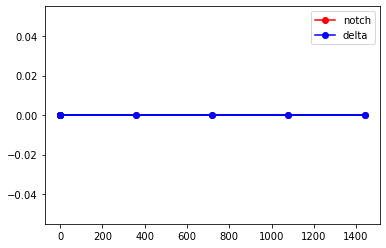

In [23]:
plt.clf()
plt.plot( times, notch , 'r-o' )
plt.plot( times, delta , 'b-o' ); 
plt.legend( {'notch', 'delta' } ) 